In [10]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /Users/yatharth/miniconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |   py39hecd8cb5_0          16 KB
    freetype-2.11.0            |       hd8bbffd_0         589 KB
    giflib-5.2.1               |       haf1e3a3_0          70 KB
    jpeg-9d                    |       h9ed2024_0         215 KB
    kiwisolver-1.3.1           |   py39h23ab428_0          53 KB
    lcms2-2.12                 |       hf1fd2bf_0         284 KB
    libpng-1.6.37              |       ha441bb4_0         262 KB
    libtiff-4.2.0              |       h87d7836_0         462 KB
    libwebp-1.2.0              |       hacca55c_0         441 KB
    libwebp-base-1.2.0         |       h9ed2024_0         389 KB
    lz4-c-1.9.3                |       h23ab428_1         140 KB
 

In [11]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [12]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [13]:
X = data["Text"]
y = data["Language"]

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [16]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [20]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9772727272727273

Accuracy is : 0.9796905222437138


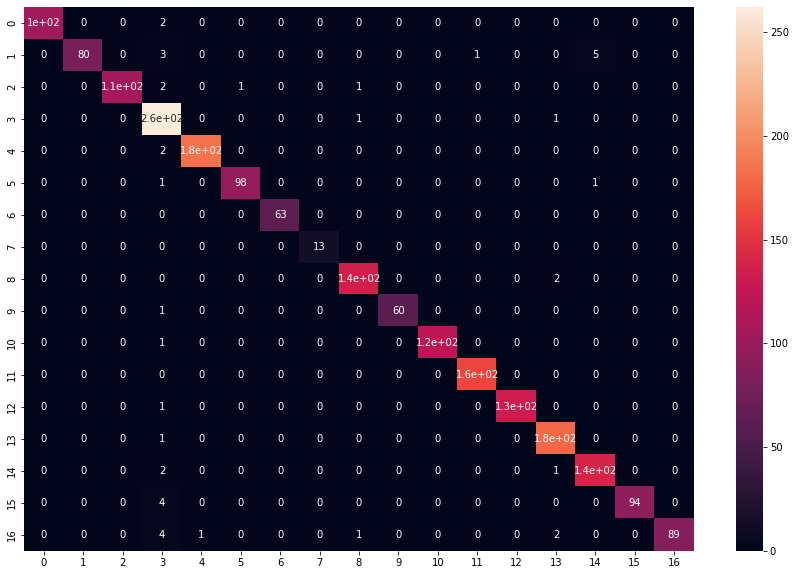

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

The Model has been Trained on a datset consisting of 16 Languages.
1. English
2. Malayalam
3. Hindi
4. Tamil
5. Kannada
6. French
7. Spanish
8. Portuguese
9. Italian
10. Russian
11. Sweedish
12. Dutch
13. Arabic
14. Turkish
15. German
16. Danish
17. Greek

To test the model's prediction power check the model on your favourite string in one of the preferred Languages Below. 

Happy Testing 😊😊

In [26]:
predict("Adiós muchachos")

The langauge is in Spanish
